# Data processing and manipulation of emotion images

source : https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

In [1]:
# Data source https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

# Using only a subset of the data with labels: angry, happy, sad, fearful


In [2]:
import os 
import tensorflow as tf
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Mke model run on CPU, the GPU version is unstable 
print(tf.__version__)
import os
import re
import shutil
import tensorflow as tf

2.0.0-alpha0


In [3]:
#list the files in the dataset directory
import numpy as np
np.random.seed(1)

In [4]:
import glob
#(glob.glob("Dataset/Training set/angry/*.jpg"))

In [5]:
import glob
angry_files=glob.glob("Dataset/Training set/angry/*.jpg")
happy_files=glob.glob("Dataset/Training set/happy/*.jpg")
fear_files=glob.glob("Dataset/Training set/fear/*.jpg")
sad_files=glob.glob("Dataset/Training set/sad/*.jpg")

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


In [7]:
print(len(angry_files)) #3993 images for training on the "angry" label
print(angry_files[0])

3993
Dataset/Training set/angry\0.jpg


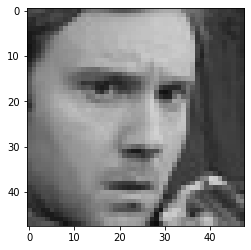

In [8]:
# Display image as greyscale original
img=mpimg.imread(angry_files[0]) # first image in the training data for "angry"
imgplot = plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.show()

In [9]:
# Image as a matrix of pixels, note the data type 

im = Image.open(angry_files[0])
image_pixels=np.asarray(im,dtype=np.int16)
image_pixels

array([[ 72,  78,  81, ...,  52,  43,  40],
       [ 65,  62,  59, ...,  55,  52,  45],
       [ 47,  42,  60, ...,  47,  54,  49],
       ...,
       [ 91,  65,  46, ...,  74,  54,  43],
       [ 76,  80,  76, ..., 108,  69,  46],
       [ 77,  74,  81, ..., 105, 108,  82]], dtype=int16)

In [10]:
print(image_pixels.shape,"\n")
print(image_pixels[0:1,0:]) # first row of the matrix above

(48, 48) 

[[ 72  78  81  75  59  54  63  61  55  55  62  46  93 114 121 119 115 109
   98  90  85  84  90  99 109 127 143 153 161 168 171 171 170 166 127 112
  112 107  96  78  64  64  56  57  61  52  43  40]]


In [11]:
image_pixels_flatten=image_pixels.flatten() # flatten 48*48 matrix
print(len(image_pixels_flatten),'\n') # 48*48=2304)
print('Max pixel value ',image_pixels_flatten.max()) # values between 0 and 255 for grey-scale image pixels. 
print('Minimum pixel value',image_pixels_flatten.min())      
      

2304 

Max pixel value  209
Minimum pixel value 11


In [12]:
#load all images as numpy arrays   "Angry faces"

#plain list

angry_images_arrays= [] # list holding flattened pixel arrays 
counter=0
for file in angry_files:
    image = Image.open(file) #open image
    image_pixels=np.asarray(image,dtype=np.int16) # convert image to matrix of pixels 
    # Make sure values are between 0 and 255 as greyscales
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
        
    
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    angry_images_arrays.append(image_pixels_flat)

print('Angry images: ',len(angry_images_arrays))

Angry images:  3993


In [13]:
happy_images_arrays= [] 
counter=0
for file in happy_files:
    image = Image.open(file)
    image_pixels=np.asarray(image,dtype=np.int16) 
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    happy_images_arrays.append(image_pixels_flat)
    
print('Happy images: ',len(happy_images_arrays))

Happy images:  7164


In [14]:
fear_images_arrays= [] 
counter=0
for file in fear_files:
    image = Image.open(file)
    image_pixels=np.asarray(image,dtype=np.int16) 
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    fear_images_arrays.append(image_pixels_flat)
print('Fear images: ',len(fear_images_arrays))

Fear images:  4103


In [15]:
sad_images_arrays= [] 
counter=0
for file in sad_files:
    image = Image.open(file)
    image_pixels=np.asarray(image,dtype=np.int16) 
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    sad_images_arrays.append(image_pixels_flat)
print('Sad images: ',len(sad_images_arrays))

Sad images:  4938


In [16]:
##
## convert lists to numpy arrays 
##
image_arrays_angry_np=np.array(angry_images_arrays) 
image_arrays_happy_np=np.array(happy_images_arrays) 
image_arrays_fear_np=np.array(fear_images_arrays) 
image_arrays_sad_np=np.array(sad_images_arrays) 

In [17]:
print('Angry array dims:',image_arrays_angry_np.shape)  # (number_of_samples,number_of_features/pixels (48*48=2304))
print('Happy array dims:',image_arrays_happy_np.shape)
print('Fear array dims:',image_arrays_fear_np.shape)  # (number_of_samples,number_of_features/pixels (48*48=2304))
print('Sad array dims:',image_arrays_sad_np.shape)


#all image types have the same dimensionality

Angry array dims: (3993, 2304)
Happy array dims: (7164, 2304)
Fear array dims: (4103, 2304)
Sad array dims: (4938, 2304)


In [18]:
image_arrays_sad_np[:8,:8] # first x samples, first x features

array([[137, 137, 142, 146, 145, 144, 144, 149],
       [ 31,  33,  32,  31,  34,  41,  44,  44],
       [ 54,  34,  44,  46,  62,  36,  28,  29],
       [194, 181, 132, 131, 172, 213, 206, 186],
       [163, 167, 153, 166, 171, 201, 199, 218],
       [135, 133, 137, 139, 141, 144, 142, 146],
       [ 15,  13,  25,  22,  23,  15,  14,  34],
       [120, 112, 111, 120, 140, 158, 180, 185]], dtype=int16)

In [19]:
image_arrays_sad_np

array([[137, 137, 142, ...,  17,  16,  15],
       [ 31,  33,  32, ...,  96,  96,  95],
       [ 54,  34,  44, ...,  41,  64,  52],
       ...,
       [ 44,  44,  45, ..., 171, 193, 199],
       [109,  23,  21, ...,  21,  24,  53],
       [ 92,  86,  87, ..., 102, 107,  97]], dtype=int16)

### Normalize pixel values by dividing by 255, what about adding +1 ?


In [20]:
image_arrays_sad_np = image_arrays_sad_np / 255
image_arrays_fear_np = image_arrays_fear_np / 255
image_arrays_happy_np = image_arrays_happy_np / 255
image_arrays_angry_np = image_arrays_angry_np / 255

In [21]:
image_arrays_sad_np

array([[0.5372549 , 0.5372549 , 0.55686275, ..., 0.06666667, 0.0627451 ,
        0.05882353],
       [0.12156863, 0.12941176, 0.1254902 , ..., 0.37647059, 0.37647059,
        0.37254902],
       [0.21176471, 0.13333333, 0.17254902, ..., 0.16078431, 0.25098039,
        0.20392157],
       ...,
       [0.17254902, 0.17254902, 0.17647059, ..., 0.67058824, 0.75686275,
        0.78039216],
       [0.42745098, 0.09019608, 0.08235294, ..., 0.08235294, 0.09411765,
        0.20784314],
       [0.36078431, 0.3372549 , 0.34117647, ..., 0.4       , 0.41960784,
        0.38039216]])

In [22]:
image_arrays_sad_np[:5,:5]  # first 5 images, the first 5 pixels

array([[0.5372549 , 0.5372549 , 0.55686275, 0.57254902, 0.56862745],
       [0.12156863, 0.12941176, 0.1254902 , 0.12156863, 0.13333333],
       [0.21176471, 0.13333333, 0.17254902, 0.18039216, 0.24313725],
       [0.76078431, 0.70980392, 0.51764706, 0.51372549, 0.6745098 ],
       [0.63921569, 0.65490196, 0.6       , 0.65098039, 0.67058824]])

## Add image labels { Angry, Happy, Fear, Sad == 0, 1, 2, 3 }

#### Using integer representations of classes, along with sparse categorical cross-entropy

In [23]:
# dictionry mapping 

integer_to_emotion = { 0 : 'Angry', 1 : 'Happy', 2:'Fear', 3:'Sad'}


In [24]:
# add the label 'angry'
new_angry_list=[]
for sample in image_arrays_angry_np:
    sample = np.append(sample, 0)
    new_angry_list.append(sample)

In [25]:
# add the label 'happy'
new_happy_list=[]
for sample in image_arrays_happy_np:
    sample = np.append(sample, 1)
    new_happy_list.append(sample)

In [26]:
# add the label 'fear'
new_fear_list=[]
for sample in image_arrays_fear_np:
    sample = np.append(sample, 2)
    new_fear_list.append(sample)

In [27]:
# add the label 'sad'
new_sad_list=[]
for sample in image_arrays_sad_np:
    sample = np.append(sample, 3)
    new_sad_list.append(sample)

In [28]:
new_angry_list[0]

array([0.28235294, 0.30588235, 0.31764706, ..., 0.42352941, 0.32156863,
       0.        ])

In [29]:
new_happy_list[0]

array([0.63529412, 0.63921569, 0.61960784, ..., 0.75294118, 0.77254902,
       1.        ])

In [30]:
new_fear_list[0]

array([0.45490196, 0.38431373, 0.33333333, ..., 0.63529412, 0.47843137,
       2.        ])

In [31]:
new_sad_list[0]

array([0.5372549 , 0.5372549 , 0.55686275, ..., 0.0627451 , 0.05882353,
       3.        ])

In [32]:
final_data_array = np.concatenate((new_angry_list,new_happy_list,new_fear_list,new_sad_list))
final_data_array

array([[0.28235294, 0.30588235, 0.31764706, ..., 0.42352941, 0.32156863,
        0.        ],
       [0.59607843, 0.58431373, 0.57647059, ..., 0.70980392, 0.71764706,
        0.        ],
       [0.11372549, 0.09803922, 0.08235294, ..., 0.67843137, 0.68235294,
        0.        ],
       ...,
       [0.17254902, 0.17254902, 0.17647059, ..., 0.75686275, 0.78039216,
        3.        ],
       [0.42745098, 0.09019608, 0.08235294, ..., 0.09411765, 0.20784314,
        3.        ],
       [0.36078431, 0.3372549 , 0.34117647, ..., 0.41960784, 0.38039216,
        3.        ]])

In [33]:
final_data_array.shape #aggregated data

(20198, 2305)

In [34]:
# gather the labels in seperate array 

labels=[]
features=[]
for sample in final_data_array:

    new_sample=np.delete(sample,-1)
    features.append(new_sample)
    labels.append(sample[-1])
    
print ('Labels :',len(labels)) # each sample has a corresponding label
print ('Feature set samples:',len(features)) # each sample has a corresponding label

Labels : 20198
Feature set samples: 20198


In [35]:
labels[:3]

[0.0, 0.0, 0.0]

In [36]:
features[:3]

[array([0.28235294, 0.30588235, 0.31764706, ..., 0.41176471, 0.42352941,
        0.32156863]),
 array([0.59607843, 0.58431373, 0.57647059, ..., 0.75686275, 0.70980392,
        0.71764706]),
 array([0.11372549, 0.09803922, 0.08235294, ..., 0.68235294, 0.67843137,
        0.68235294])]

In [37]:
features = np.array(features,np.float32) #
features.shape 

(20198, 2304)

In [38]:
labels = np.array(labels,np.int8)
labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int8)

In [39]:
labels.shape

(20198,)

# Import test data

In [55]:
# Training sets of each category 
angry_test_files = glob.glob("Dataset/Test set/angry/*.jpg")
happy_test_files = glob.glob("Dataset/Test set/happy/*.jpg")
fear_test_files = glob.glob("Dataset/Test set/fear/*.jpg")
sad_test_files = glob.glob("Dataset/Test set/sad/*.jpg")

In [56]:
angry_test_files[:5]

['Dataset/Test set/angry\\10052.jpg',
 'Dataset/Test set/angry\\10065.jpg',
 'Dataset/Test set/angry\\10079.jpg',
 'Dataset/Test set/angry\\10095.jpg',
 'Dataset/Test set/angry\\10121.jpg']

In [57]:
#load all images as numpy arrays   "Angry faces"

#plain list

angry_test_images_arrays= [] # list holding flattened pixel arrays 
counter=0
for file in angry_test_files:
    image = Image.open(file) #open image
    image_pixels=np.asarray(image,dtype=np.int16) # convert image to matrix of pixels 
    # Make sure values are between 0 and 255 as greyscales
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
        
    
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    angry_test_images_arrays.append(image_pixels_flat)

print('Angry images: ',len(angry_test_images_arrays))

Angry images:  960


In [58]:
#load all images as numpy arrays   "Haopy faces"

#plain list

happy_test_images_arrays= [] # list holding flattened pixel arrays 
counter=0
for file in happy_test_files:
    image = Image.open(file) #open image
    image_pixels=np.asarray(image,dtype=np.int16) # convert image to matrix of pixels 
    # Make sure values are between 0 and 255 as greyscales
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
        
    
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    happy_test_images_arrays.append(image_pixels_flat)

print('Angry images: ',len(happy_test_images_arrays))

Angry images:  1825


In [59]:
#load all images as numpy arrays   "Fear faces"

#plain list

fear_test_images_arrays= [] # list holding flattened pixel arrays 
counter=0
for file in fear_test_files:
    image = Image.open(file) #open image
    image_pixels=np.asarray(image,dtype=np.int16) # convert image to matrix of pixels 
    # Make sure values are between 0 and 255 as greyscales
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
        
    
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    fear_test_images_arrays.append(image_pixels_flat)

print('Angry images: ',len(fear_test_images_arrays))

Angry images:  1018


In [60]:
#load all images as numpy arrays   "Sad faces"

#plain list

sad_test_images_arrays= [] # list holding flattened pixel arrays 
counter=0
for file in sad_test_files:
    image = Image.open(file) #open image
    image_pixels=np.asarray(image,dtype=np.int16) # convert image to matrix of pixels 
    # Make sure values are between 0 and 255 as greyscales
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
        
    
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    sad_test_images_arrays.append(image_pixels_flat)

print('Angry images: ',len(sad_test_images_arrays))

Angry images:  1139


In [61]:
test_image_arrays_angry_np=np.array(angry_test_images_arrays) 
test_image_arrays_happy_np=np.array(happy_test_images_arrays) 
test_image_arrays_fear_np=np.array(fear_test_images_arrays) 
test_image_arrays_sad_np=np.array(sad_test_images_arrays)

In [62]:
test_image_arrays_angry_np

array([[ 58,  66,  70, ...,   5,   7,   9],
       [ 23,  26,  21, ..., 252, 252, 253],
       [201, 182, 182, ..., 190, 199, 207],
       ...,
       [ 86,  49,  46, ..., 219, 220, 219],
       [ 96,  97,  99, ...,  48,  58,  65],
       [ 11,  11,  15, ...,  23,  22,  23]], dtype=int16)

In [63]:
print(test_image_arrays_angry_np.shape)
print(test_image_arrays_happy_np.shape) 
print(test_image_arrays_fear_np.shape) 
print(test_image_arrays_sad_np.shape)

(960, 2304)
(1825, 2304)
(1018, 2304)
(1139, 2304)


In [64]:
test_image_arrays_sad_np = test_image_arrays_sad_np / 255
test_image_arrays_fear_np = test_image_arrays_fear_np / 255
test_image_arrays_happy_np = test_image_arrays_happy_np / 255
test_image_arrays_angry_np = test_image_arrays_angry_np / 255

In [65]:
test_image_arrays_angry_np

array([[0.22745098, 0.25882353, 0.2745098 , ..., 0.01960784, 0.02745098,
        0.03529412],
       [0.09019608, 0.10196078, 0.08235294, ..., 0.98823529, 0.98823529,
        0.99215686],
       [0.78823529, 0.71372549, 0.71372549, ..., 0.74509804, 0.78039216,
        0.81176471],
       ...,
       [0.3372549 , 0.19215686, 0.18039216, ..., 0.85882353, 0.8627451 ,
        0.85882353],
       [0.37647059, 0.38039216, 0.38823529, ..., 0.18823529, 0.22745098,
        0.25490196],
       [0.04313725, 0.04313725, 0.05882353, ..., 0.09019608, 0.08627451,
        0.09019608]])

In [66]:
import itertools


#putting labels inside the data 

# use a zip method to loop through a bucnh of arrays

new_angry_list_test=[]
new_happy_list_test=[]
new_fear_list_test=[]
new_sad_list_test=[]

#list(itertools.izip_longest(a, b, c))


for tuple_ in list(itertools.zip_longest(test_image_arrays_angry_np,test_image_arrays_happy_np,
                                          test_image_arrays_fear_np,
                                          test_image_arrays_sad_np)):
    #print(tuple_[1])
    #Add the corresponding label to each sample

    angry=np.append(tuple_[0],0)
    new_angry_list_test.append(angry)
    happy=np.append(tuple_[1],1)
    new_happy_list_test.append(happy)
    fear=np.append(tuple_[2],2)
    new_fear_list_test.append(fear)
    sad=np.append(tuple_[3],3)
    new_sad_list_test.append(sad)


In [67]:
#b Lists are padded a sa result of the zip loop

print(len(new_angry_list_test))
print(len(new_happy_list_test))
print(len(new_fear_list_test))
print(len(new_sad_list_test))

1825
1825
1825
1825


In [68]:
new_angry_list_test[-10:] #last few objects are none (as a sideeffect of the zip loop)

[array([None, 0], dtype=object),
 array([None, 0], dtype=object),
 array([None, 0], dtype=object),
 array([None, 0], dtype=object),
 array([None, 0], dtype=object),
 array([None, 0], dtype=object),
 array([None, 0], dtype=object),
 array([None, 0], dtype=object),
 array([None, 0], dtype=object),
 array([None, 0], dtype=object)]

In [69]:
new_happy_list_test[-3:] # this is the only list which has no 'Nones', since it was the longest

[array([0.69803922, 0.54509804, 0.50980392, ..., 0.30980392, 0.31764706,
        1.        ]),
 array([0.95294118, 0.95294118, 0.93333333, ..., 0.9372549 , 0.94117647,
        1.        ]),
 array([0.22352941, 0.21960784, 0.22352941, ..., 0.03529412, 0.0627451 ,
        1.        ])]

In [70]:
#get rid of None values
final_angry_list_test = [sample for sample in new_angry_list_test if sample.dtype != object ]
final_fear_list_test = [sample for sample in new_fear_list_test if sample.dtype != object]
final_sad_list_test = [sample for sample in new_sad_list_test if sample.dtype != object]
final_happy_list_test = [sample for sample in new_happy_list_test if sample.dtype != object]


In [71]:
#correct sizes
print(len(final_angry_list_test))
print(len(final_happy_list_test))
print(len(final_fear_list_test))
print(len(final_sad_list_test))

960
1825
1018
1139


In [72]:
final_happy_list_test[-3:] # this is the only list which has no 'Nones', since it was the longest

[array([0.69803922, 0.54509804, 0.50980392, ..., 0.30980392, 0.31764706,
        1.        ]),
 array([0.95294118, 0.95294118, 0.93333333, ..., 0.9372549 , 0.94117647,
        1.        ]),
 array([0.22352941, 0.21960784, 0.22352941, ..., 0.03529412, 0.0627451 ,
        1.        ])]

In [73]:
final_angry_list_test[-5:] #eliminated the Nones

[array([0.27058824, 0.27058824, 0.2627451 , ..., 0.09411765, 0.09411765,
        0.        ]),
 array([0.78039216, 0.70980392, 0.28627451, ..., 0.20392157, 0.17647059,
        0.        ]),
 array([0.3372549 , 0.19215686, 0.18039216, ..., 0.8627451 , 0.85882353,
        0.        ]),
 array([0.37647059, 0.38039216, 0.38823529, ..., 0.22745098, 0.25490196,
        0.        ]),
 array([0.04313725, 0.04313725, 0.05882353, ..., 0.08627451, 0.09019608,
        0.        ])]

In [74]:
test_data_array = np.concatenate((final_angry_list_test,final_happy_list_test,final_fear_list_test,final_sad_list_test))

In [75]:
test_data_array.shape  # all of the test tensors stacked together

(4942, 2305)

In [76]:
# finally grab the test labels

test_labels=[]
test_features=[]
for sample in test_data_array:

    new_sample=np.delete(sample,-1)
    test_features.append(new_sample)
    test_labels.append(sample[-1])
    
print ('Labels :',len(test_labels)) # each sample has a corresponding label
print ('Feature set samples:',len(test_features)) # each sample has a corresponding label

Labels : 4942
Feature set samples: 4942


# Visualize images one last time before saving

In [77]:
len(labels)

20198

In [78]:
labels[14000:14500]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

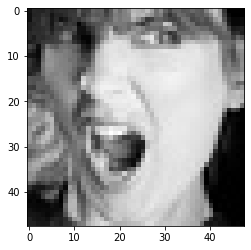

In [79]:
plt.imshow(features[700].reshape(48,48), cmap = 'gray')

In [80]:
print(integer_to_emotion[labels[700]])

Angry


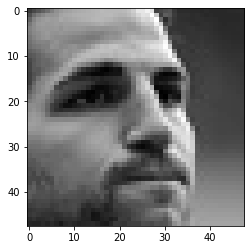

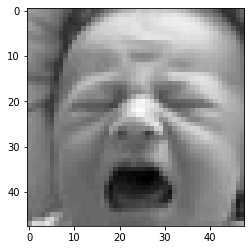

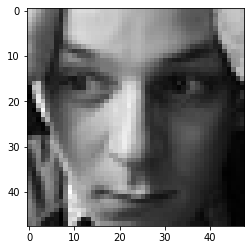

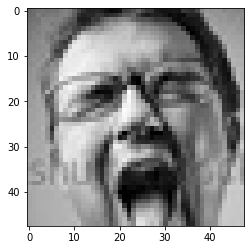

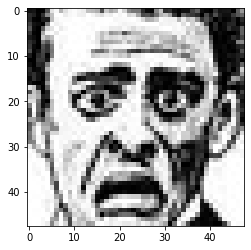

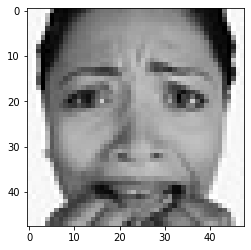

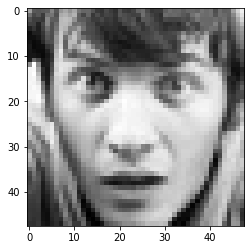

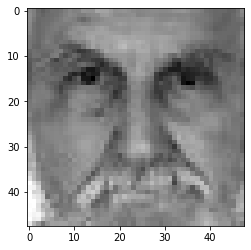

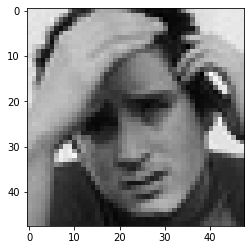

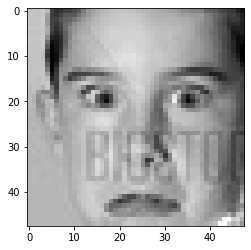

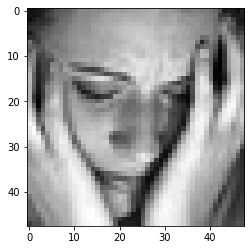

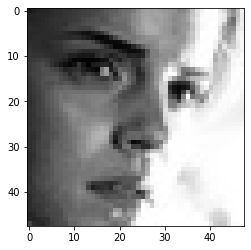

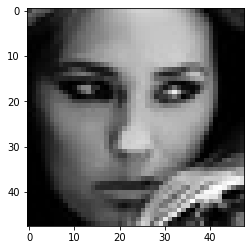

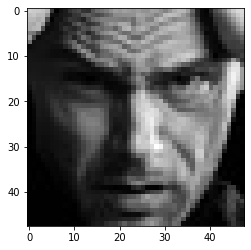

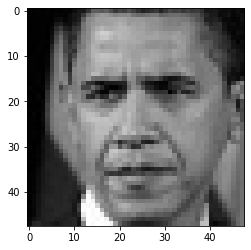

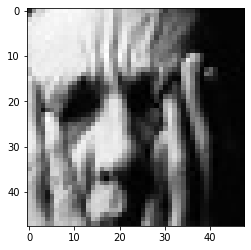

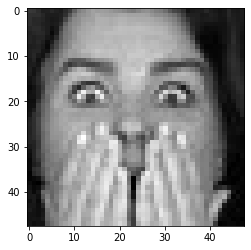

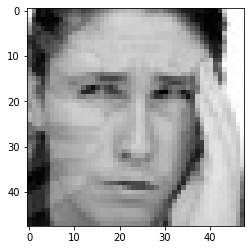

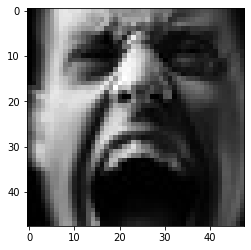

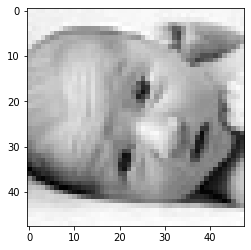

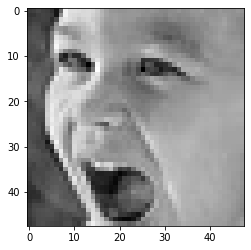

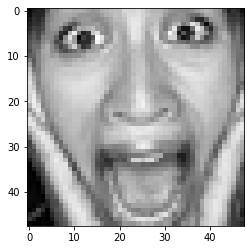

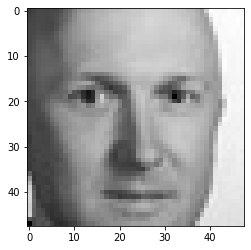

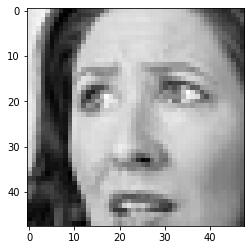

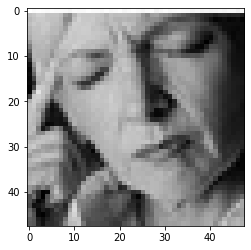

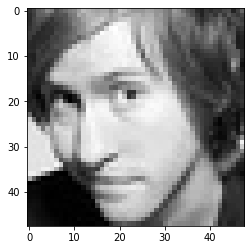

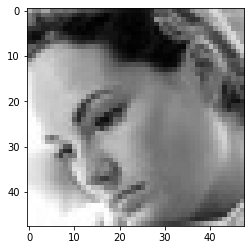

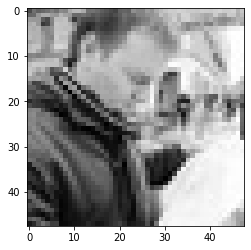

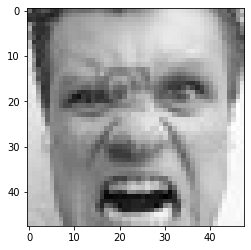

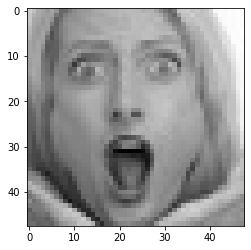

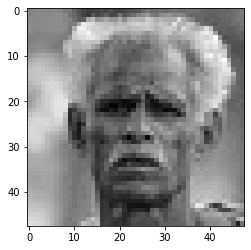

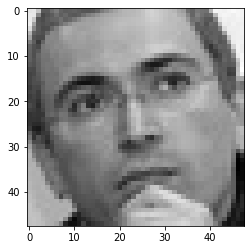

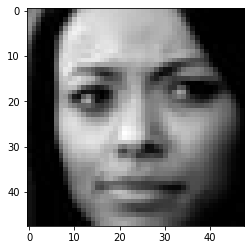

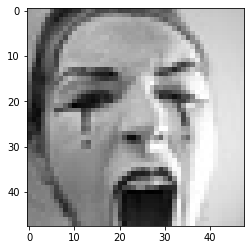

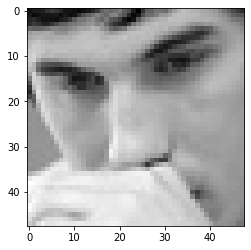

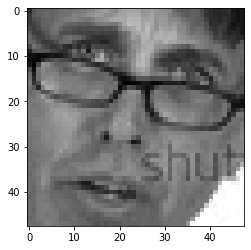

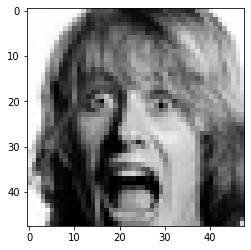

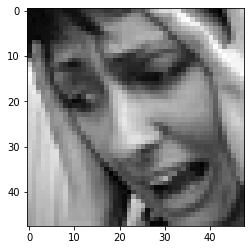

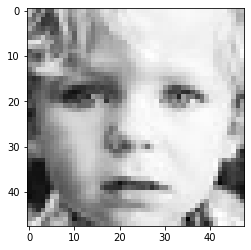

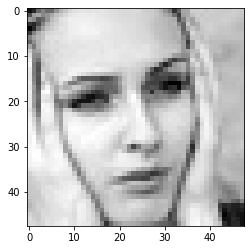

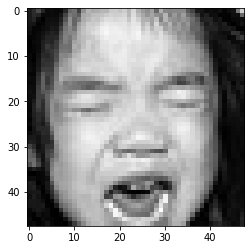

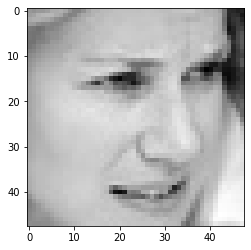

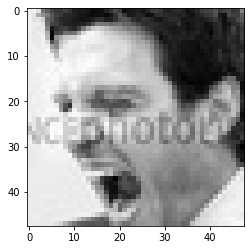

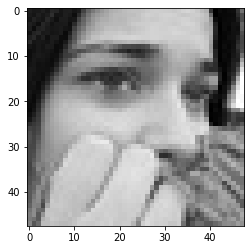

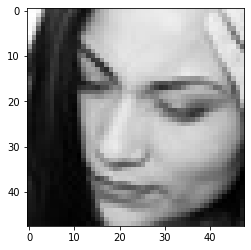

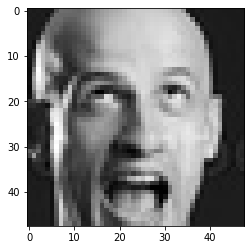

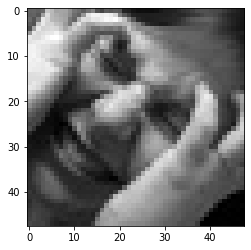

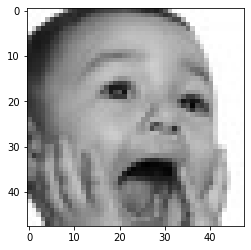

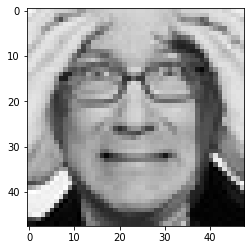

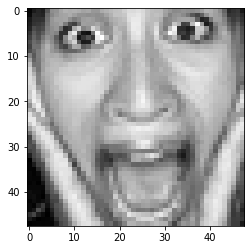

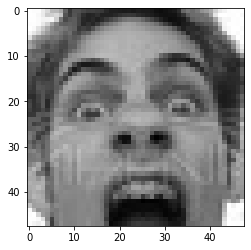

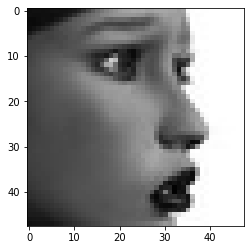

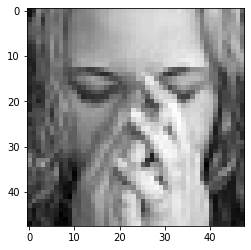

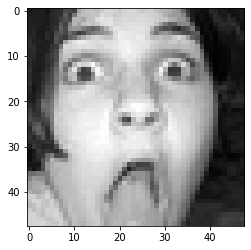

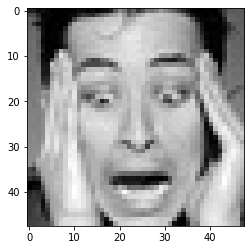

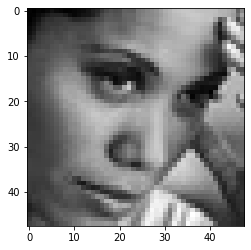

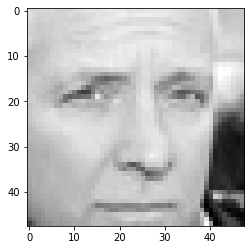

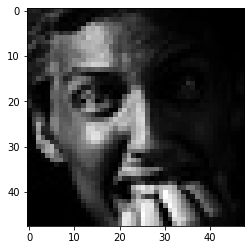

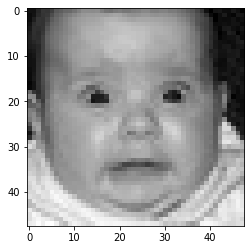

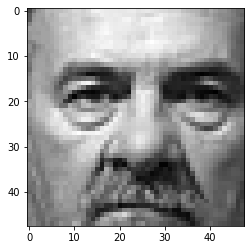

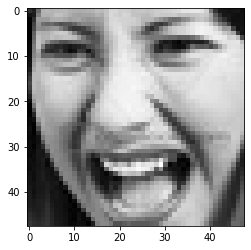

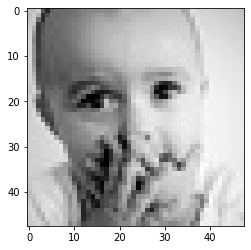

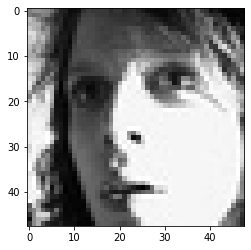

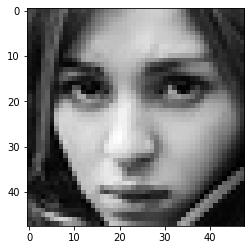

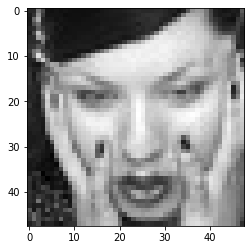

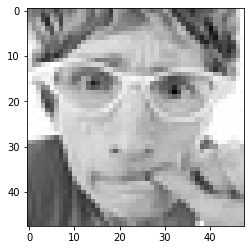

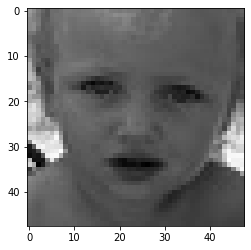

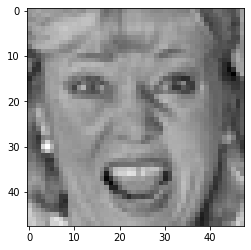

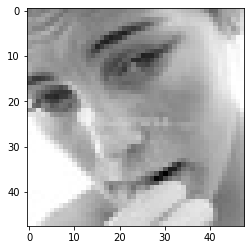

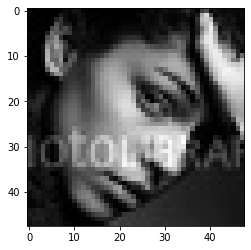

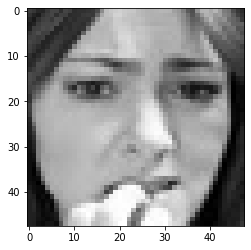

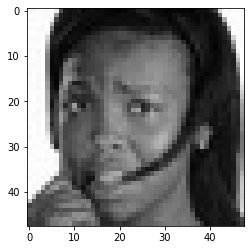

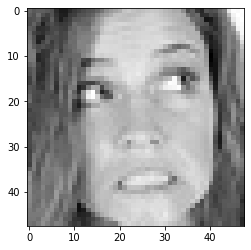

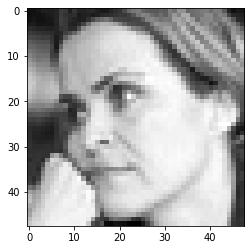

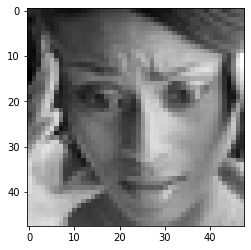

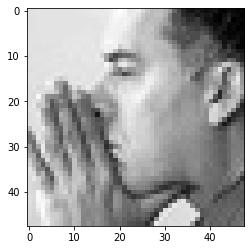

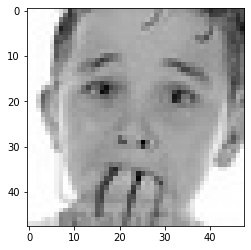

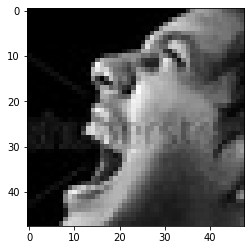

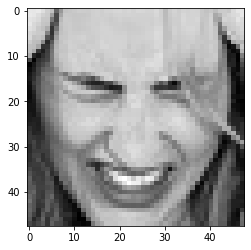

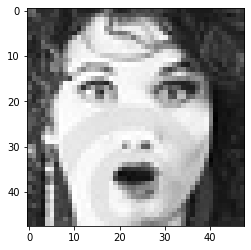

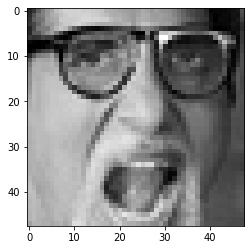

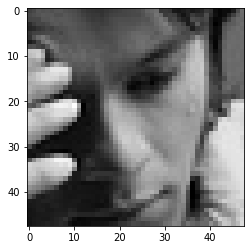

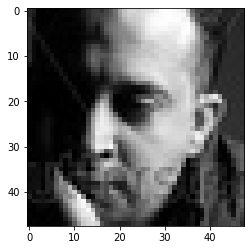

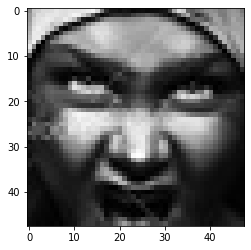

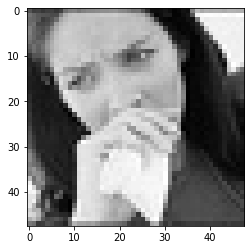

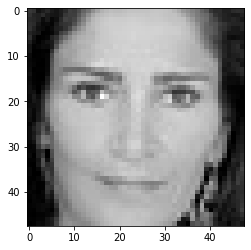

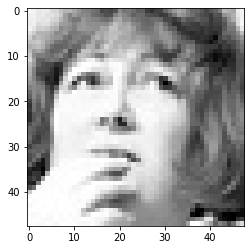

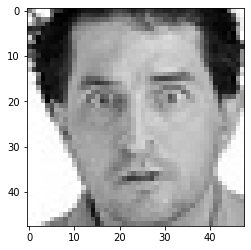

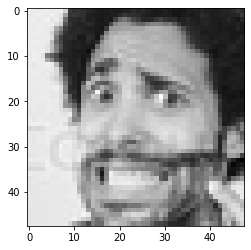

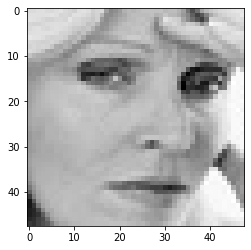

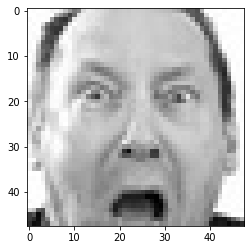

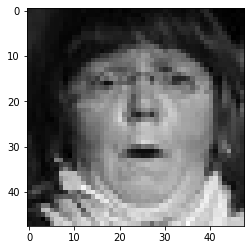

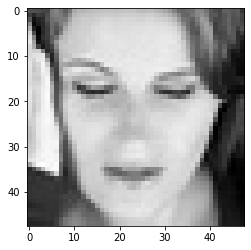

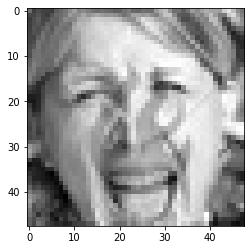

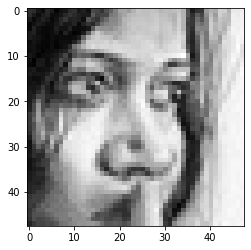

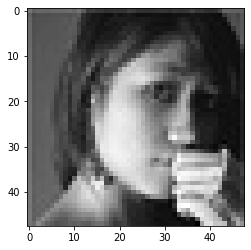

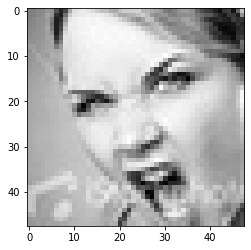

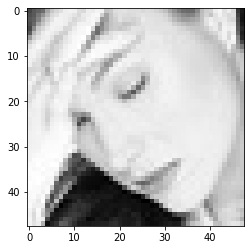

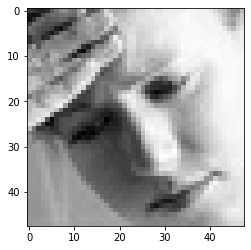

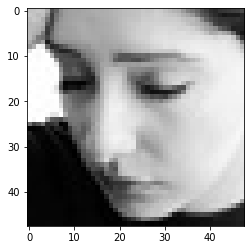

In [81]:
for i in range(14000,14100):
    plt.imshow(features[i].reshape(48,48), cmap = 'gray')
    plt.show()
    

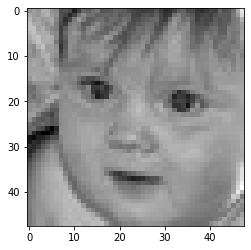

In [82]:
plt.imshow(test_features[1952].reshape(48,48), cmap = 'gray')

In [83]:
test_labels[79]
print(integer_to_emotion[test_labels[1951]])

Happy


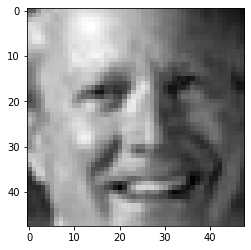

In [84]:
plt.imshow(test_features[1821].reshape(48,48), cmap = 'gray')

In [85]:
test_labels[1821]
integer_to_emotion[test_labels[1821]]

'Happy'

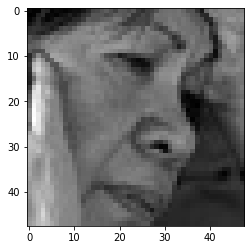

Sad


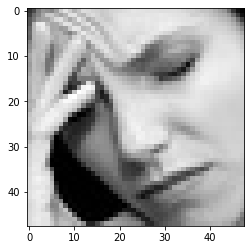

Sad


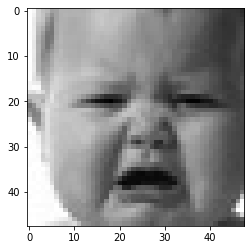

Sad


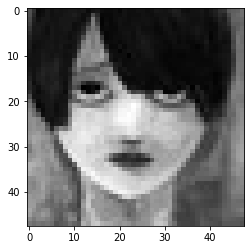

Sad


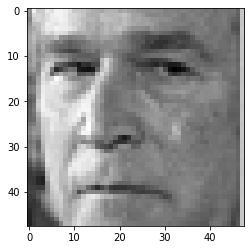

Sad


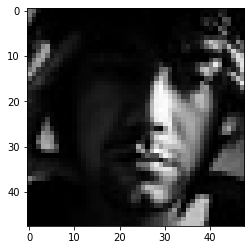

Sad


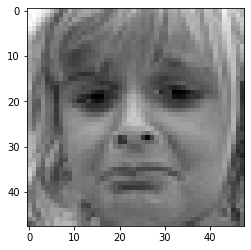

Sad


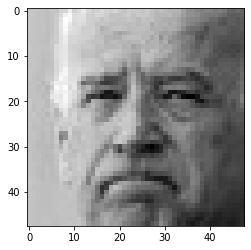

Sad


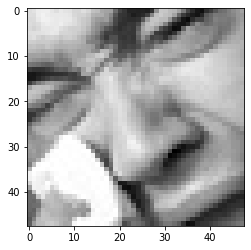

Sad


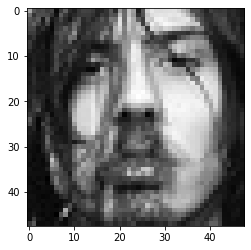

Sad


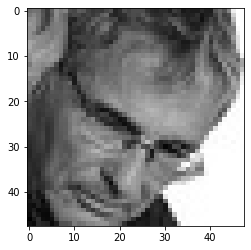

Sad


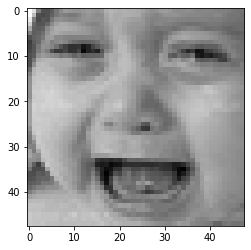

Sad


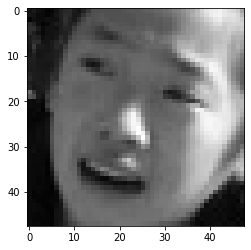

Sad


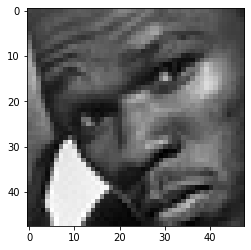

Sad


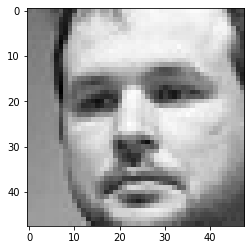

Sad


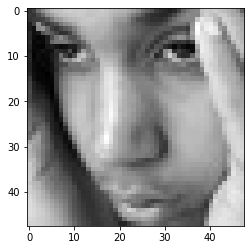

Sad


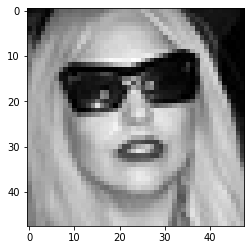

Sad


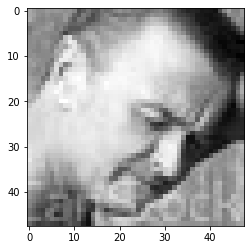

Sad


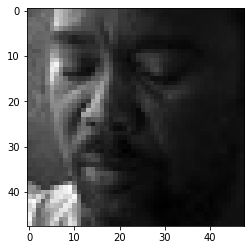

Sad


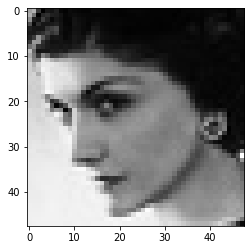

Sad


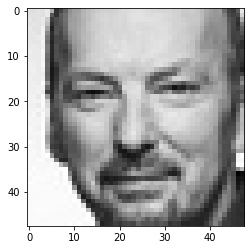

Sad


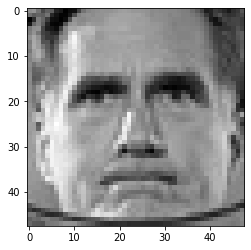

Sad


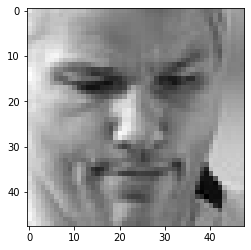

Sad


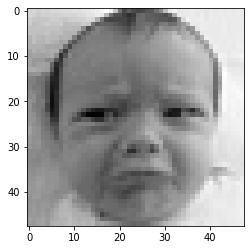

Sad


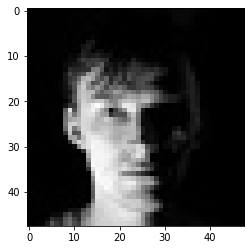

Sad


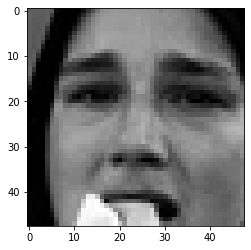

Sad


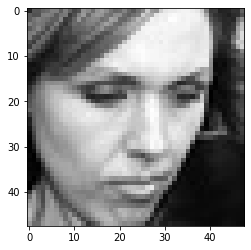

Sad


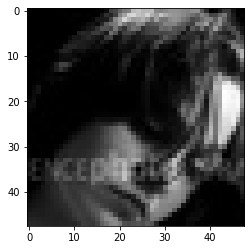

Sad


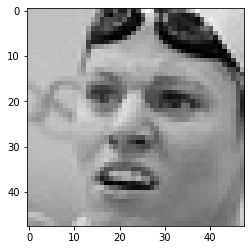

Sad


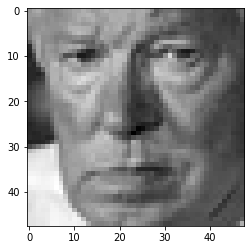

Sad


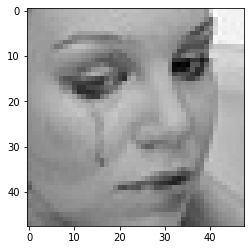

Sad


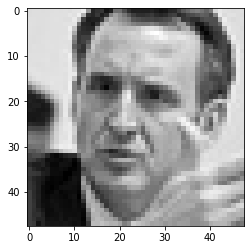

Sad


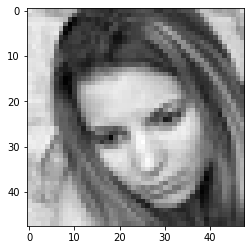

Sad


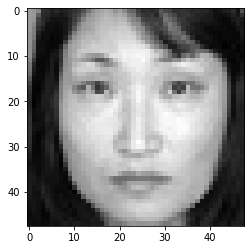

Sad


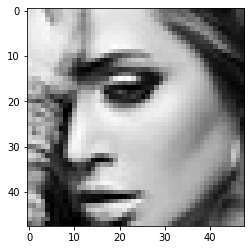

Sad


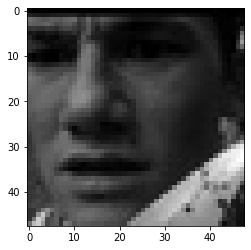

Sad


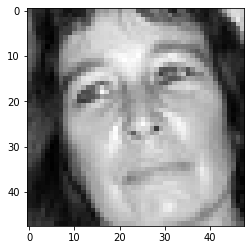

Sad


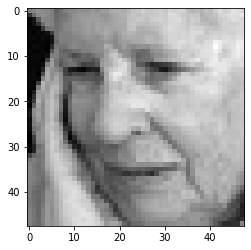

Sad


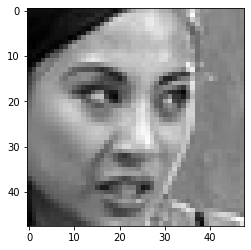

Sad


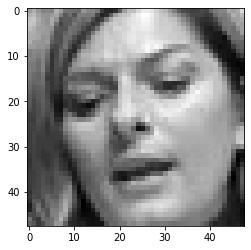

Sad


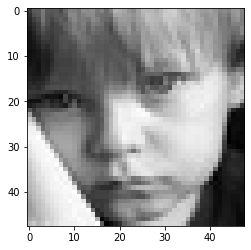

Sad


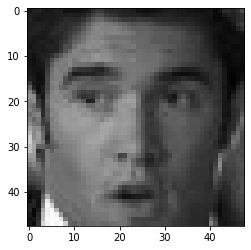

Sad


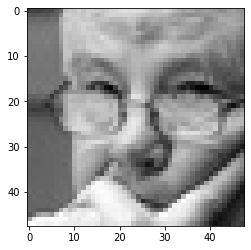

Sad


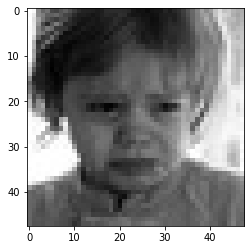

Sad


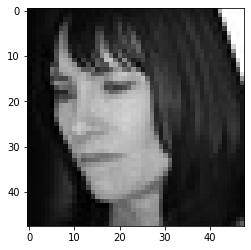

Sad


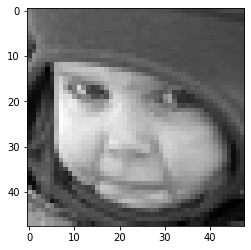

Sad


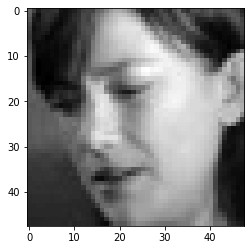

Sad


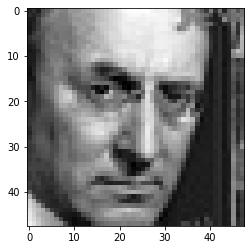

Sad


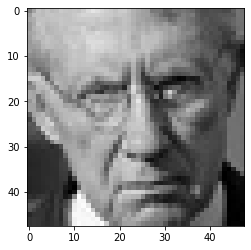

Sad


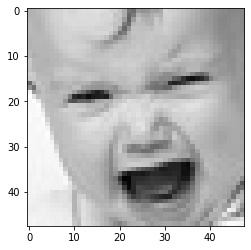

Sad


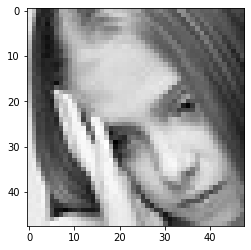

Sad


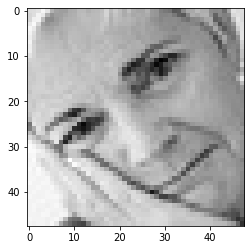

Sad


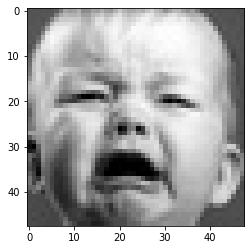

Sad


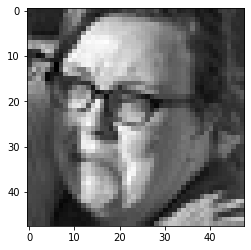

Sad


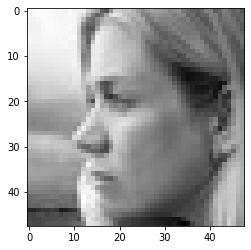

Sad


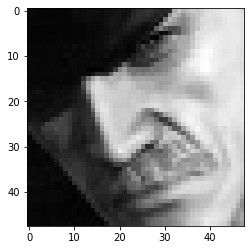

Sad


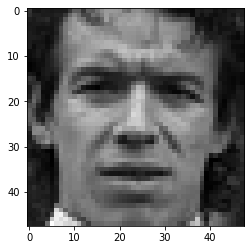

Sad


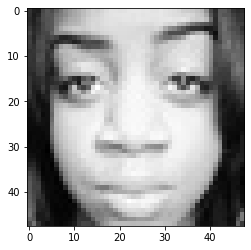

Sad


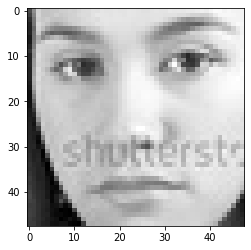

Sad


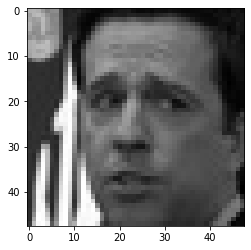

Sad


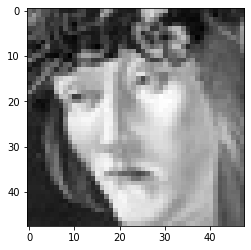

Sad


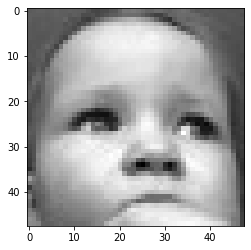

Sad


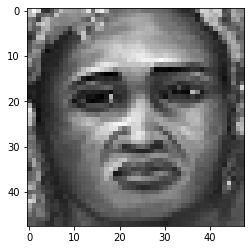

Sad


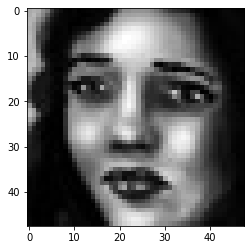

Sad


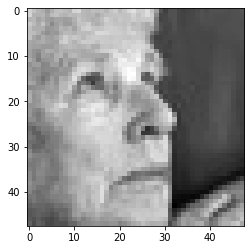

Sad


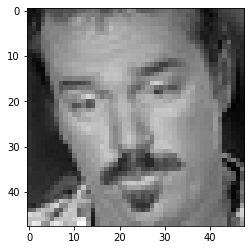

Sad


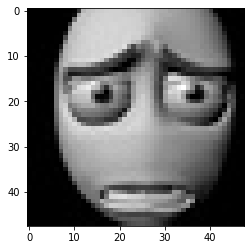

Sad


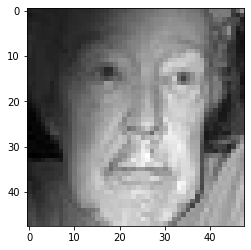

Sad


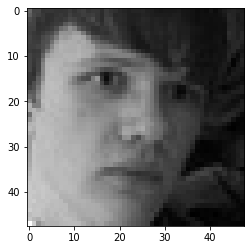

Sad


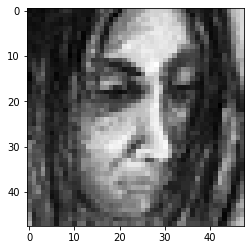

Sad


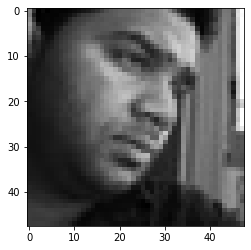

Sad


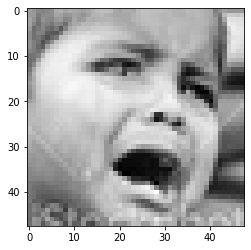

Sad


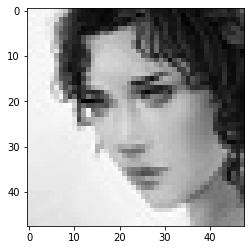

Sad


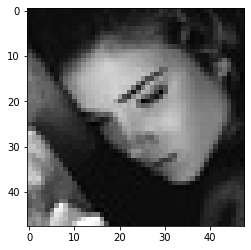

Sad


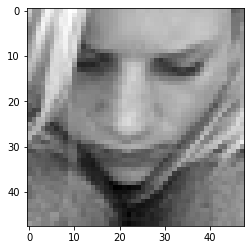

Sad


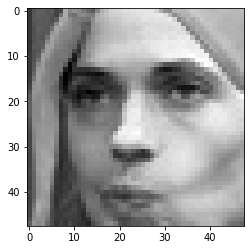

Sad


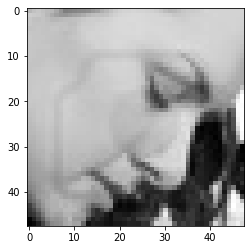

Sad


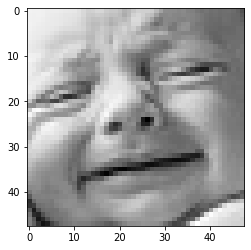

Sad


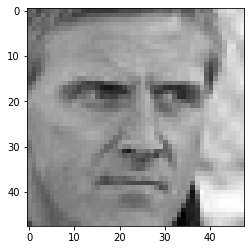

Sad


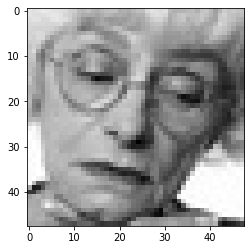

Sad


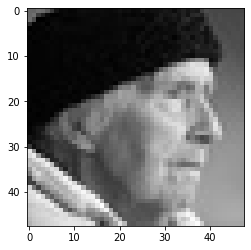

Sad


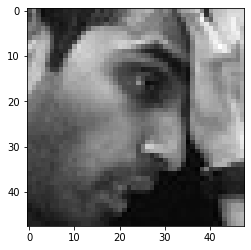

Sad


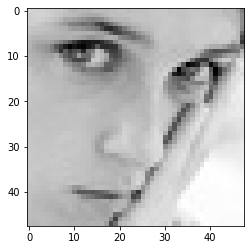

Sad


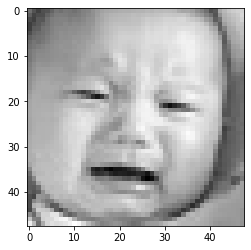

Sad


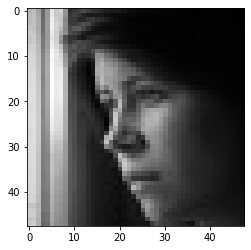

Sad


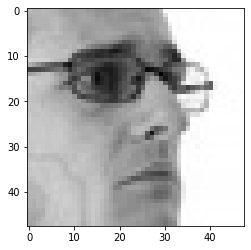

Sad


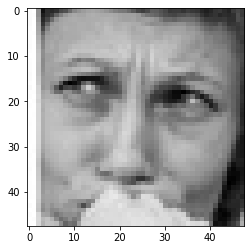

Sad


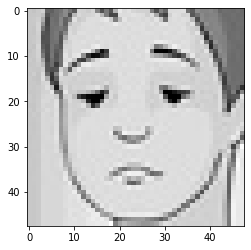

Sad


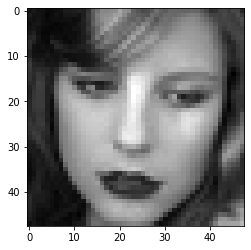

Sad


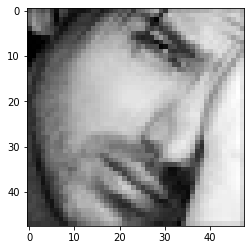

Sad


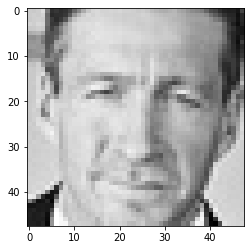

Sad


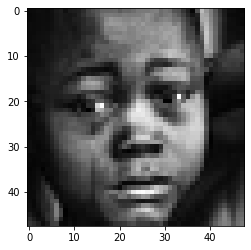

Sad


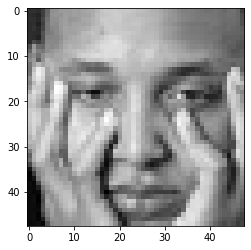

Sad


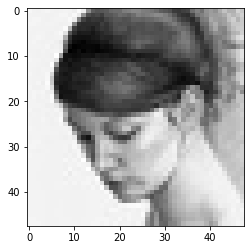

Sad


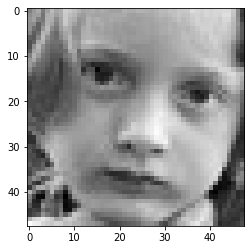

Sad


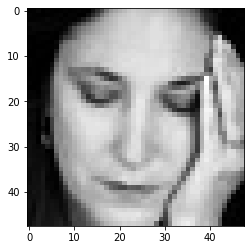

Sad


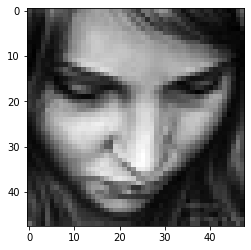

Sad


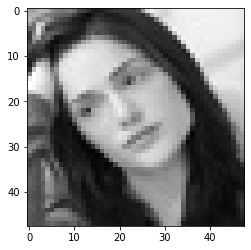

Sad


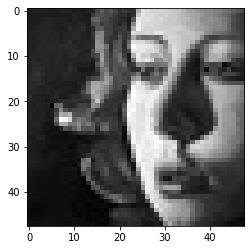

Sad


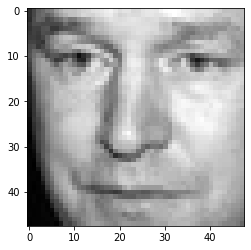

Sad


In [86]:
for i in range(4000,4100):
    plt.imshow(test_features[i].reshape(48,48), cmap = 'gray')    
    plt.show()
    print(integer_to_emotion[test_labels[i]])

In [87]:
test_labels[4000:4100]

[3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0]

# Pickle the processed Train/Test data

In [92]:
import pickle

file_name = 'Dataset/processed/training_features'
pickle.dump( features, open( file_name+".pickle", "wb" ) )

In [93]:
file_name = 'Dataset/processed/test_features'
pickle.dump( test_features, open( file_name+".pickle", "wb" ) )

In [94]:
file_name = 'Dataset/processed/training_labels'
pickle.dump( labels, open( file_name+".pickle", "wb" ) )

In [95]:
file_name = 'Dataset/processed/test_labels'
pickle.dump( test_labels, open( file_name+".pickle", "wb" ) )

## End of Pre-processing Notebook -----